In [72]:
import pandas as pd
import numpy as np

# . Exploratory Data Analysis (EDA)

In [73]:
df=pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [75]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [76]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [77]:
for col in df.select_dtypes(include=np.number):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers}")

Outliers in age:
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  False      0.0  upsloping  normal    0  
Outliers in trestbps:
     age     sex               cp  trestbps  chol    fbs           restecg  \
190   53    Male     asymptomatic        80     0   True            normal   
243   39    Male  atypical angina       190   241  False            normal   
383   63  Female  atypical angina       181     0  False            normal   
384   74    Male      non-anginal       188     0  False            normal   
387   45    Male      non-anginal       193   236  False            normal   
396   55    Male      non-anginal       196   406  False  st-t abnormality   
487   54    Male  atypical angina       192   283  False    lv hypertrophy   
488   63    Male     asymptomatic       185     0  False            normal   
58

In [78]:
if (df['age'] < 0).any():
  print("Inconsistency found: Negative age values")


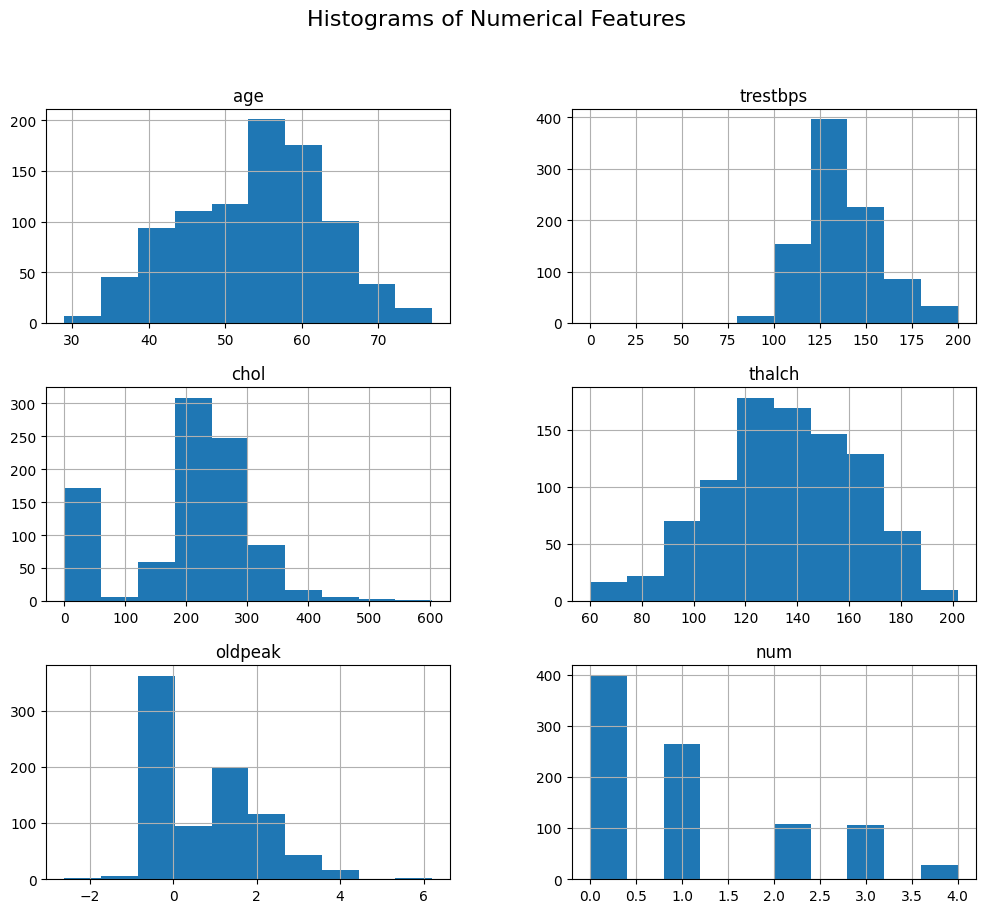

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)

plt.show()

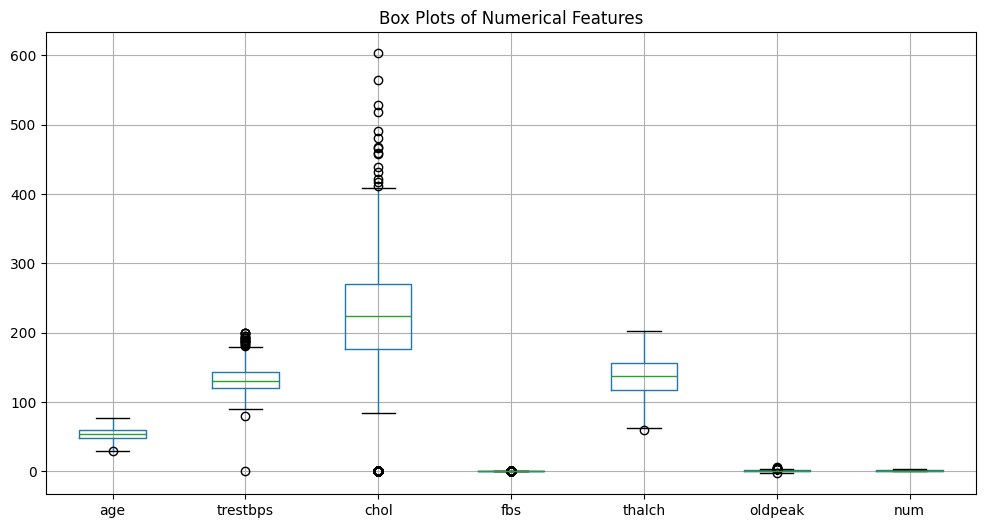

In [80]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=0)
plt.show()

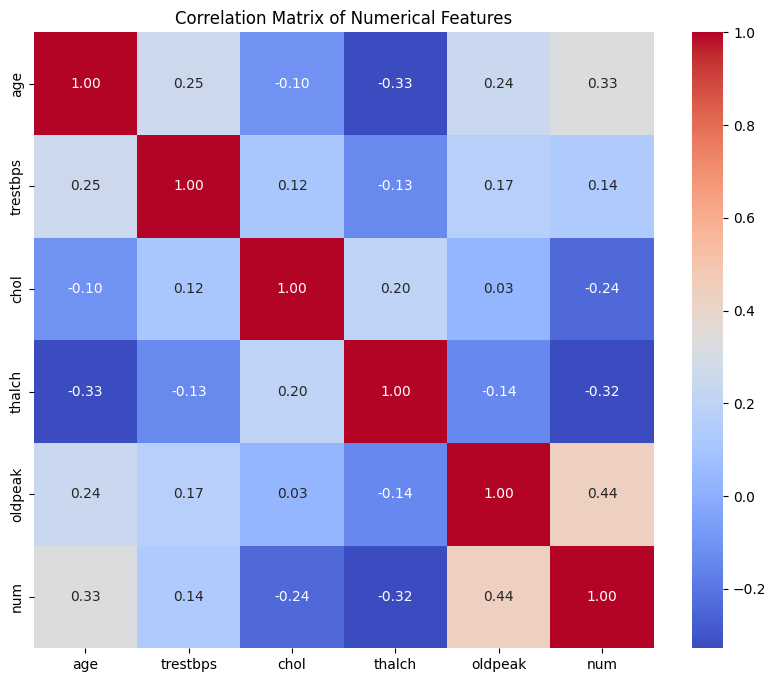

In [81]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
pip install pipeline

# . Feature Engineering

In [83]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [84]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [85]:
categorical_cols = df.select_dtypes(exclude=np.number).columns
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [86]:
for col in categorical_cols:
        df[col] = df[col].astype(str)

In [87]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [88]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'))])

In [90]:
df_processed = preprocessor.fit_transform(df)
df_processed

array([[ 1.00602683,  0.56739446,  0.28129674, ...,  1.        ,
         0.        ,  0.        ],
       [-1.39756029,  0.07696688,  0.01352615, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.35050307,  0.32218067, -0.0846564 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24124911,  0.5183517 ,  0.05815458, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.35050307,  0.42026619,  0.67402693, ...,  0.        ,
         0.        ,  1.        ]])

In [91]:
num_features = numerical_cols.tolist()
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_features = num_features + list(cat_features)

In [92]:
all_features

['age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak',
 'num',
 'sex_Female',
 'sex_Male',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'fbs_False',
 'fbs_True',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'exang_FALSE',
 'exang_False',
 'exang_TURE',
 'exang_True',
 'slope_downsloping',
 'slope_flat',
 'slope_upsloping',
 'thal_fixed defect',
 'thal_normal',
 'thal_reversable defect']

#  Decision Tree Classification

In [101]:
from sklearn.model_selection import train_test_split

In [108]:
X = pd.DataFrame(df_processed, columns=all_features)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

          age  trestbps      chol    thalch   oldpeak       num  sex_Female  \
84  -1.288306 -0.658674  0.834689  0.972109 -0.815718 -0.881977         0.0   
10  -2.599354  1.793463  0.316999  1.270726 -0.815718 -0.881977         1.0   
617  2.207820  0.322181  0.316999 -1.566136 -0.815718 -0.007703         0.0   
250 -1.397560 -1.443359 -1.798388 -0.931575 -0.815718 -0.881977         0.0   
869 -0.523529  0.175052 -0.530941 -2.536642 -0.343952  1.740845         0.0   

     sex_Male  cp_asymptomatic  cp_atypical angina  ...  exang_FALSE  \
84        1.0              0.0                 1.0  ...          0.0   
10        0.0              0.0                 0.0  ...          0.0   
617       1.0              0.0                 0.0  ...          0.0   
250       1.0              1.0                 0.0  ...          0.0   
869       1.0              0.0                 0.0  ...          1.0   

     exang_False  exang_TURE  exang_True  slope_downsloping  slope_flat  \
84           1.0 

(182,)

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [113]:
y_pred = clf.predict(X_test)
y_pred

array([63, 58, 41, 61, 54, 67, 60, 48, 53, 60, 52, 56, 42, 41, 45, 58, 39,
       49, 50, 61, 54, 42, 51, 70, 57, 72, 51, 66, 54, 41, 51, 61, 51, 46,
       52, 46, 44, 69, 49, 61, 39, 39, 70, 43, 53, 62, 48, 41, 40, 55, 63,
       62, 54, 56, 53, 47, 64, 57, 39, 65, 50, 44, 56, 36, 45, 52, 58, 46,
       65, 37, 47, 62, 50, 43, 41, 53, 54, 49, 51, 62, 47, 54, 45, 51, 51,
       54, 51, 54, 58, 58, 38, 57, 48, 37, 59, 57, 58, 52, 39, 37, 46, 55,
       62, 43, 53, 68, 56, 56, 48, 57, 60, 59, 52, 62, 40, 60, 46, 44, 43,
       52, 52, 63, 55, 57, 51, 46, 50, 57, 72, 41, 57, 42, 56, 38, 52, 65,
       52, 61, 55, 38, 58, 36, 52, 61, 63, 62, 62, 44, 62, 43, 64, 54, 56,
       56, 41, 54, 57, 52, 50, 45, 48, 58, 43, 63, 56, 54, 72, 48, 66, 45,
       49, 32, 42, 56, 44, 63, 41, 52, 65, 53, 54, 45])

In [114]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [115]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          32       1.00      1.00      1.00         1\n          36       1.00      1.00      1.00         2\n          37       1.00      1.00      1.00         3\n          38       1.00      1.00      1.00         3\n          39       1.00      1.00      1.00         5\n          40       1.00      1.00      1.00         2\n          41       1.00      1.00      1.00         8\n          42       1.00      1.00      1.00         4\n          43       1.00      1.00      1.00         6\n          44       1.00      1.00      1.00         5\n          45       1.00      1.00      1.00         6\n          46       1.00      1.00      1.00         6\n          47       1.00      1.00      1.00         3\n          48       1.00      1.00      1.00         6\n          49       1.00      1.00      1.00         4\n          50       1.00      1.00      1.00         5\n          51       1.00      1.00      1.00         9\n       

In [118]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

1.0

In [119]:
recall = recall_score(y_test, y_pred, average='weighted')
recall

1.0

In [120]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

1.0

# . Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [135]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [137]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [136]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best Score: 0.9834860651865848


In [138]:
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9945054945054945
              precision    recall  f1-score   support

          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          36       1.00      1.00      1.00         2
          37       1.00      1.00      1.00         3
          38       1.00      1.00      1.00         3
          39       1.00      1.00      1.00         5
          40       1.00      1.00      1.00         2
          41       1.00      1.00      1.00         8
          42       1.00      1.00      1.00         4
          43       1.00      1.00      1.00         6
          44       1.00      1.00      1.00         5
          45       1.00      1.00      1.00         6
          46       1.00      1.00      1.00         6
          47       1.00      1.00      1.00         3
          48       1.00      1.00      1.00         6
          49       1.00      1.00      1.00         4
          50       1.00      1.00      1.00    

# . Model Evaluation and Analysis

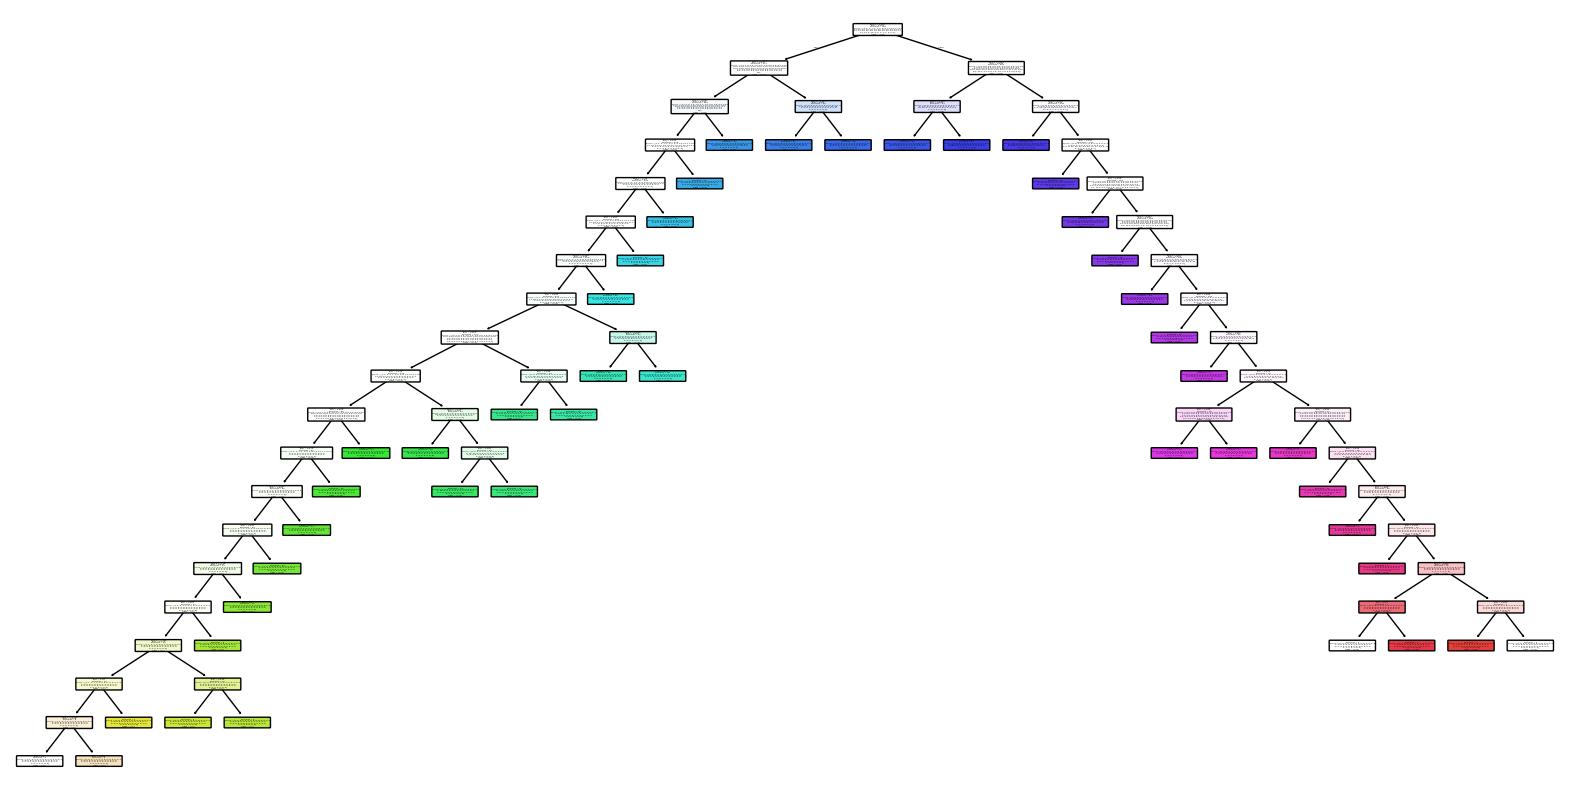

In [142]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

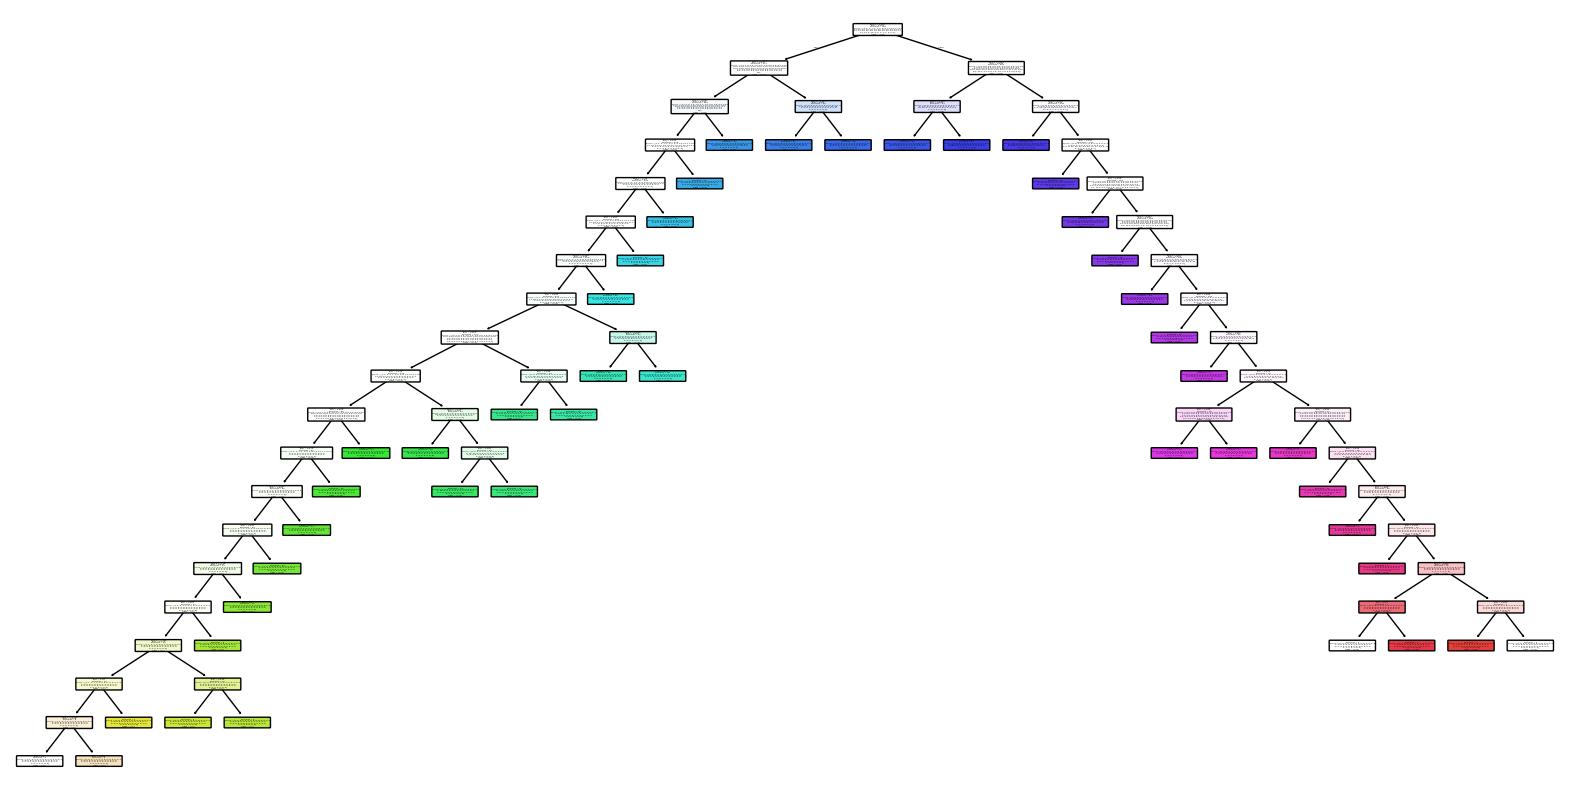

In [145]:
plt.figure(figsize=(20,20))
plot_tree(best_clf, filled=True, feature_names=all_features, class_names=True, rounded=True)
plt.show()

# Interview Questions


##  What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


### 1. max_depth:
###   Definition: The maximum depth of the tree.

###   Effect: Controls the complexity of the tree. Smaller values prevent overfitting by limiting the tree's depth, while larger values can lead to overfitting by allowing the tree to learn very specific details of the training data.  A depth of `None` allows the tree to grow until all leaves are pure or contain less than `min_samples_split` samples.

### 2. min_samples_split:
###    Definition: The minimum number of samples required to split an internal node.

###    Effect:  Prevents the creation of nodes with very few samples, which could lead to overfitting. Larger values tend to produce simpler trees.

### 3. min_samples_leaf:
###   Definition: The minimum number of samples required to be at a leaf node.
###   Effect: Similar to `min_samples_split`, but applied to leaf nodes.  Helps to prevent overfitting by ensuring that each leaf node represents a sufficient number of training samples.

### 4. splitter:
###    Definition: The strategy used to choose the split at each node.
###    Effect: Options include "best" (finds the best split among all possible splits) and "random" (finds the best split among a random subset of features).  "random" can lead to more diverse trees and potentially better generalization in some cases.


##  What is the difference between the Label encoding and One-hot encoding?

### Label Encoding:


### Method: Assigns a unique integer to each category in a categorical feature.  For example, if a feature has categories "red," "green," and "blue," label encoding might assign 0 to "red," 1 to "green," and 2 to "blue."
### Impact on Model: Introduces an ordinal relationship between the categories, even if one doesn't exist.  This can be problematic for algorithms that assume an inherent order (e.g., k-NN, linear models).  For instance, the model might interpret "blue" as being "greater than" "green" which is often not the case.
### Use Cases:Suitable for ordinal categorical variables (where the order matters), or when memory usage is a major concern and the model is not sensitive to the ordinal assumption.



### *One-Hot Encoding:



### Method: Creates new binary (0 or 1) features for each category. For the same "red," "green," and "blue" example, it would create three new features: "is_red," "is_green," and "is_blue."  A data point with "red" would have "is_red" as 1 and the other two as 0.
### Impact on Model: Avoids imposing an ordinal relationship.  Each category is represented independently, preventing the model from misinterpreting the categorical data. This is generally better for nominal data (where order doesn't matter).
### Use Cases: Best for nominal categorical variables (where order does not matter). It's preferred when the model could be sensitive to the ordering of categories. However, it can increase the dimensionality of the dataset (more features).


        